In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [2]:
al = pd.read_csv('data/hackathon/allenby_routes_2018-12-23_2018-12-29.csv.gz', compression='gzip')

In [3]:
geometry = [Point(xy) for xy in zip(al.lon, al.lat)]
al = al.drop(['lon', 'lat'], axis=1)
crs = {'init': 'epsg:4326'}
al = gpd.GeoDataFrame(al, crs=crs, geometry=geometry)
al.head()

timestamp time_recorded  agency_id  route_short_name  \
0  2018-12-29T23:58:55.906      23:59:07          5                61   
1  2018-12-29T23:58:55.906      23:58:58          5                61   
2  2018-12-29T23:58:55.903      23:58:04          5                24   
3  2018-12-29T23:58:55.903      23:59:10          5                24   
4  2018-12-29T23:58:55.806      23:57:38          5                66   

   route_id  bus_id  trip_id_to_date planned_start_time predicted_end_time  \
0      2512    7841         35651484           23:40:00           00:22:00   
1      2512    7963         35651483           23:15:00           00:01:00   
2      2365   10320         23775920           23:30:00           00:18:00   
3      2365   10154         23775919           23:00:00           00:00:00   
4      2533    7978         35673037           23:52:00           00:43:00   

                                      geometry  
0  POINT (34.81273651123047 32.08029174804688)  
1  POINT (34.77205657958984 32.06575012207031)  
2  POINT (34.80229568481445 32.12204360961914)  
3   POINT (34.7702751159668 32.06482315063477)  
4  POINT (34.76522064208984 32.06755828857422)

In [4]:
route_ids = al.route_id.unique()
route_ids

array([ 2512,  2365,  2533,  9794,  2340,  2532,  9792,  2510,  2362,
        2332,  2324,  2519,  9803,  2415,  2296,  2419,  2374,  9808,
        2542,  2567,  2323,  2342,  9827,  2328,  9817,  9816,  2964,
        2326,  7721,  9784,  2259,  2517,  9782,  2566,  2962,  7723,
        9809,  2380,  9806, 19353,  9807, 17906,  7724, 17055,  7705,
        9723,  3530, 13760, 10497, 11089,    94, 22987,  9485, 11205,
        2256,  9825,  2327, 19354, 10373,  2255, 17054,  2513,  9810,
        2334,  2341,  7704,  7719,  2361,  9781,  9783,  2379,  2369,
        2961,  2709,  2703,  7700, 10934,  2963,  2243,  7701,  2244,
        7716, 10120,  2358,  7699,  2364, 17827, 21999,  1034,  2778,
        1027,  2320,  2317,  2319, 17826,  9791,  9793,  2777,  9212,
        2705,  2376,  1035,  2343, 10933, 10119,  2381,  2439,  2738,
        2514,  2373, 20850,  2318,  7720,  2710,  2335,  9211,  2382,
       11206,    95,  2949, 10372,  2953,  2948,  3529, 11090, 17494,
        1048,  2950,

In [ ]:
import glob
rs = (pd.concat([pd.read_csv(f, compression='gzip', index_col=0) 
                 for f in glob.glob('data\\gtfs_stats_csv_gz_hack\\*12-2[3-9]_route_stats.csv.gz')])
      .assign(date = lambda x: pd.to_datetime(x.date))
      .assign(dayofweek = lambda x: x['date'].dt.strftime('%A')))

rs = rs[rs.route_id.isin(route_ids)]

In [ ]:
rs.head().T

In [6]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [10]:
from bokeh.plotting import figure
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.palettes import inferno, magma

# web mercator coordinates (got them here https://epsg.io/map)
Center_Israel = x_range, y_range = ((3852120,3852120+10e4), (3729820,3729820+10e4/1.3))

plot_width  = int(540)
plot_height = int(plot_width//1.3)

def base_plot(tools='pan,wheel_zoom,box_zoom,reset', active_drag='pan', 
              active_scroll='wheel_zoom', toolbar_location='left',
              plot_width=plot_width, plot_height=plot_height, **plot_args):
    p = figure(tools=tools, active_drag=active_drag, active_scroll=active_scroll,
               toolbar_location=toolbar_location,
                plot_width=plot_width, plot_height=plot_height,
                #x_range=x_range, y_range=y_range, 
                outline_line_color=None,
                min_border=0, min_border_left=0, min_border_right=0,
                min_border_top=0, min_border_bottom=0, **plot_args)
    
    p.axis.visible = False
    p.xgrid.grid_line_color = None
    p.ygrid.grid_line_color = None
    return p

options = dict(line_color=None, fill_color='red', size=1)

p = base_plot()
p.add_tile(CARTODBPOSITRON)
al_mercator = al[al.route_short_name==61].to_crs({'init': 'epsg:3857'})
p.circle(x=al_mercator.geometry.x, y=al_mercator.geometry.y, **options)
show(p)

In [8]:
dal = al.sort_values(by=['agency_id', 'bus_id', 'timestamp']).to_crs(epsg=2039)


In [20]:
dal.head()

timestamp time_recorded  agency_id  route_short_name  \
1621380  2018-12-23T03:42:41.564      03:43:01          3               489   
1621357  2018-12-23T03:43:41.527      03:44:05          3               489   
1621334  2018-12-23T03:44:41.524      03:45:05          3               489   
1621313  2018-12-23T03:45:41.474      03:45:57          3               489   
1621292  2018-12-23T03:46:41.517      03:47:09          3               489   

         route_id   bus_id  trip_id_to_date planned_start_time  \
1621380     13763  7500269         13680551           03:30:00   
1621357     13763  7500269         13680551           03:30:00   
1621334     13763  7500269         13680551           03:30:00   
1621313     13763  7500269         13680551           03:30:00   
1621292     13763  7500269         13680551           03:30:00   

        predicted_end_time                                     geometry  \
1621380           04:07:00  POINT (178764.5453755447 663176.9555479531)   
1621357           04:06:00  POINT (179126.6463681214 663192.8601600232)   
1621334           04:06:00   POINT (179329.710470841 663348.1529519483)   
1621313           04:06:00  POINT (179603.5542185114 662905.0231691665)   
1621292           04:06:00  POINT (179280.2750213345 662869.9125304364)   

               dist  
1621380         NaN  
1621357  362.450115  
1621334  255.638184  
1621313  520.916886  
1621292  325.180252

In [23]:
dal['timestamp'] = pd.to_datetime(dal.timestamp, infer_datetime_format=True)

In [27]:
dal['dt_recorded'] = pd.to_datetime(dal.timestamp.dt.strftime('%Y-%m-%d')+' ' +dal.time_recorded, format='%Y-%m-%d %H:%M:%S')
dal['log_record_td'] = dal.dt_recorded-dal.timestamp
dal.sort_values('log_record_td', ascending=False).head()

timestamp time_recorded  agency_id  route_short_name  \
1333171 2018-12-24 00:00:04.253      23:59:59          5               161   
1333135 2018-12-24 00:00:08.168      23:59:59          5                19   
1333126 2018-12-24 00:00:08.975      23:59:59          5                18   
1333160 2018-12-24 00:00:06.465      23:59:56          5                24   
1333158 2018-12-24 00:00:06.700      23:59:52          5                63   

         route_id  bus_id  trip_id_to_date planned_start_time  \
1333171      9806   10036         35646488           23:45:00   
1333135      2342    7722         35663276           23:10:00   
1333126      2332     566         35658810           23:25:00   
1333160      2361   10314         35897493           23:30:00   
1333158      2517   10328         35651586           23:25:00   

        predicted_end_time                                     geometry  dist  \
1333171           00:27:00  POINT (179823.3362873182 665783.6636874212)   NaN   
1333135           00:01:00  POINT (181447.6941948435 651390.0745907149)   NaN   
1333126           00:01:00    POINT (180430.070211133 665003.385962259)   NaN   
1333160           00:20:00  POINT (182459.9956023845 669561.0465228989)   NaN   
1333158           00:04:00   POINT (183305.519788909 663234.7120953866)   NaN   

                dt_recorded   log_record_td  
1333171 2018-12-24 23:59:59 23:59:54.747000  
1333135 2018-12-24 23:59:59 23:59:50.832000  
1333126 2018-12-24 23:59:59 23:59:50.025000  
1333160 2018-12-24 23:59:56 23:59:49.535000  
1333158 2018-12-24 23:59:52 23:59:45.300000

In [36]:
dal.loc[dal.log_record_td<pd.Timedelta(-23, unit='h'), 'dt_recorded'] = dal.loc[dal.log_record_td<pd.Timedelta(-23, unit='h'), 'dt_recorded']+pd.Timedelta(1, 'd')
dal.loc[dal.log_record_td<pd.Timedelta(-23, unit='h'), 'dt_recorded'] = dal.loc[dal.log_record_td>pd.Timedelta(23, unit='h'), 'dt_recorded']+pd.Timedelta(-1, 'd')

In [40]:
dal = dal.sort_values(by=['agency_id', 'bus_id', 'dt_recorded'])

In [41]:
l=dal.groupby(['agency_id', 'bus_id']).apply(lambda x: x.distance(x.shift()))

In [49]:
dal['dist'] = l.reset_index().set_index('level_2')[[0]]

In [50]:
timediff=dal.groupby(['agency_id', 'bus_id']).apply(lambda x: x.dt_recorded.diff().dt.total_seconds())

In [51]:
timediff.reset_index().head()

agency_id   bus_id  level_2  dt_recorded
0          3  7500269  1621380          NaN
1          3  7500269  1621357         64.0
2          3  7500269  1621334         60.0
3          3  7500269  1621313         52.0
4          3  7500269  1621292         72.0

In [52]:
dal['time_diff'] = timediff.reset_index().set_index('level_2').dt_recorded

In [55]:
dal['speed'] = (dal.dist/1000) / (dal.time_diff/3600)

In [56]:
dal.head()

timestamp time_recorded  agency_id  route_short_name  \
1621380 2018-12-23 03:42:41.564      03:43:01          3               489   
1621357 2018-12-23 03:43:41.527      03:44:05          3               489   
1621334 2018-12-23 03:44:41.524      03:45:05          3               489   
1621313 2018-12-23 03:45:41.474      03:45:57          3               489   
1621292 2018-12-23 03:46:41.517      03:47:09          3               489   

         route_id   bus_id  trip_id_to_date planned_start_time  \
1621380     13763  7500269         13680551           03:30:00   
1621357     13763  7500269         13680551           03:30:00   
1621334     13763  7500269         13680551           03:30:00   
1621313     13763  7500269         13680551           03:30:00   
1621292     13763  7500269         13680551           03:30:00   

        predicted_end_time                                     geometry  \
1621380           04:07:00  POINT (178764.5453755447 663176.9555479531)   
1621357           04:06:00  POINT (179126.6463681214 663192.8601600232)   
1621334           04:06:00   POINT (179329.710470841 663348.1529519483)   
1621313           04:06:00  POINT (179603.5542185114 662905.0231691665)   
1621292           04:06:00  POINT (179280.2750213345 662869.9125304364)   

               dist         dt_recorded   log_record_td  time_diff      speed  
1621380         NaN 2018-12-23 03:43:01 00:00:19.436000        NaN        NaN  
1621357  362.450115 2018-12-23 03:44:05 00:00:23.473000       64.0  20.387819  
1621334  255.638184 2018-12-23 03:45:05 00:00:23.476000       60.0  15.338291  
1621313  520.916886 2018-12-23 03:45:57 00:00:15.526000       52.0  36.063477  
1621292  325.180252 2018-12-23 03:47:09 00:00:27.483000       72.0  16.259013

In [123]:
dal[(dal.dt_recorded.isna())].shape()

timestamp time_recorded  agency_id  route_short_name  \
1333179 2018-12-23 23:59:59.816      00:00:20          5               104   
1333183 2018-12-23 23:59:59.435      00:00:20          5               104   
1333182 2018-12-23 23:59:59.488      00:00:29          5               125   
1333185 2018-12-23 23:59:59.031      00:00:21          5               125   
1333184 2018-12-23 23:59:59.031      00:00:22          5               125   
1333181 2018-12-23 23:59:59.566      00:00:05         25               282   

         route_id   bus_id  trip_id_to_date planned_start_time  \
1333179      9792     7829         29785222           23:10:00   
1333183      9794     7970         29785276           23:45:00   
1333182      2964     7992         23808533           23:45:00   
1333185      2962    10093         23808064           23:30:00   
1333184      2962    10097         23808065           00:00:00   
1333181     19354  8911333         35687932           23:15:00   

        predicted_end_time                                     geometry  \
1333179           00:03:00   POINT (185044.998723484 662037.0540932582)   
1333183           00:22:00  POINT (181301.6600602291 662976.7840045915)   
1333182           00:38:00  POINT (176634.9350566989 659857.7800016126)   
1333185           00:25:00   POINT (178707.840524646 662689.4402213228)   
1333184           00:51:00  POINT (180568.6061984927 670622.6996608311)   
1333181           00:37:00  POINT (188801.0606187082 669407.9735545991)   

                 dist dt_recorded            log_record_td  time_diff  speed  \
1333179   6368.962384         NaT -1 days +00:00:20.184000        NaN    NaN   
1333183   5494.137688         NaT -1 days +00:00:20.565000        NaN    NaN   
1333182   2623.767719         NaT -1 days +00:00:29.512000        NaN    NaN   
1333185   6102.088203         NaT -1 days +00:00:21.969000        NaN    NaN   
1333184  14383.841031         NaT -1 days +00:00:22.969000        NaN    NaN   
1333181   2612.017577         NaT -1 days +00:00:05.434000        NaN    NaN   

                    x             y  hour  
1333179  3.878387e+06  3.770022e+06     0  
1333183  3.873971e+06  3.771119e+06     0  
1333182  3.868485e+06  3.767403e+06     0  
1333185  3.870915e+06  3.770767e+06     0  
1333184  3.873072e+06  3.780176e+06     0  
1333181  3.882788e+06  3.778769e+06     0

In [93]:
dal['hour'] = dal.dt_recorded.fillna(pd.Timestamp('20120101')).dt.strftime("%H").astype(int)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
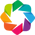

In [57]:
import holoviews as hv
#import qgrid
import seaborn as sns
#qgrid.enable()

%matplotlib inline

hv.extension('bokeh', width="100")
%opts Curve [width=600 height=250 tools=['hover'] ] {+framewise} VLine (color="black")
%opts Bars  [width=800 height=400 tools=['hover'] group_index=1 legend_position='top_left' xrotation=90]
%opts HeatMap [radial=True width=800 height=800 tools=["hover"]]

In [112]:
import holoviews as hv, geoviews as gv, dask.dataframe as dd, cartopy.crs as crs
from colorcet import fire
from holoviews.operation.datashader import datashade

options = dict(width=600, height=600, xaxis=None, yaxis=None, bgcolor='black', cmap='fire')

In [ ]:
dal[dal.route_id==]

In [101]:
dal_mercator = dal.to_crs({'init': 'epsg:3857'})
pd.concat([dal_mercator.geometry.x, dal_mercator.geometry.y], axis=1)
xy.head()

0             1
1621380  3.870979e+06  3.771345e+06
1621357  3.871406e+06  3.771365e+06
1621334  3.871645e+06  3.771550e+06
1621313  3.871969e+06  3.771026e+06
1621292  3.871589e+06  3.770983e+06

In [108]:
points = hv.Points(xy.rename(columns={0: 'x', 1: 'y'}), ['x', 'y'])
trip_points = datashade(points, x_sampling=0.8, y_sampling=0.8, cmap=fire).opts(plot=options)
url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'
tiles = gv.WMTS(url, crs=crs.GOOGLE_MERCATOR)
tiles * trip_points

:DynamicMap   []
   :Overlay
      .WMTS.I :WMTS   [Longitude,Latitude]
      .RGB.I  :RGB   [x,y]   (R,G,B,A)

In [84]:
from holoviews.operation.datashader import datashade, rasterize
from holoviews import opts

In [120]:

siri_ds = hv.Dataset(dal)
grouped = siri_ds.to(hv.Points, ['x', 'y'], groupby=['hour', 'route_id'], dynamic=True)
datashade = datashade(grouped, cmap=fire).redim.values(hour=range(24)).redim.values(route_id=[2510, 2512]).opts(plot=options)
url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{Z}/{Y}/{X}.jpg'
tiles = gv.WMTS(url, crs=crs.GOOGLE_MERCATOR).options(alpha=0.5)
tiles * datashade

:DynamicMap   [hour,route_id]
   :Overlay
      .WMTS.I :WMTS   [Longitude,Latitude]
      .RGB.I  :RGB   [x,y]   (R,G,B,A)

In [103]:
dal[dal.route_short_name==61].route_id.value_counts()

2510    29161
2512    24397
2514     9005
2511     3191
2513       96
Name: route_id, dtype: int64

In [70]:
dal[['x', 'y']] = xy

In [74]:
import param, parambokeh
from colorcet import cm_n
from holoviews.streams import RangeXY

url_base='https://server.arcgisonline.com/ArcGIS/rest/services/'
url_suffix = '/MapServer/tile/{Z}/{Y}/{X}.jpg'
opts = dict(width=600,height=800,xaxis=None,yaxis=None,bgcolor='black',show_grid=False)

class AutotelExplorer(hv.streams.Stream):
    alpha      = param.Magnitude(default=0.35, doc="Alpha value for the map opacity")
    sampling   = param.Magnitude(default=0.21, doc="Sampling")
    colormap   = param.ObjectSelector(default=cm_n["fire"], objects=cm_n.values())
    route   = param.ObjectSelector(default=2510, objects=[2510, 2512])
    tile_type  = param.ObjectSelector(default='World_Street_Map', objects=['World_Imagery', 'World_Street_Map', 'World_Topo_Map', 'World_Physical_Map'])

    def make_view(self, x_range, y_range, **kwargs):
        tiles = gv.WMTS(url_base+self.tile_type+url_suffix,crs=crs.GOOGLE_MERCATOR)
        map_tiles = tiles.options(alpha=self.alpha, **opts)
        points = hv.Points(dal[dal.route_id==self.location], ['x', 'y'])
        trip_points = datashade(points, x_sampling=(self.sampling**2)*1000, y_sampling=(self.sampling**2)*1000, cmap=self.colormap,
                               dynamic=False, x_range=x_range, y_range=y_range, width=600, height=800)
        return map_tiles * trip_points

ModuleNotFoundError: No module named 'parambokeh'

In [ ]:
explorer = AutotelExplorer(name="AutoTel Trips")
parambokeh.Widgets(explorer, callback=explorer.event)
hv.DynamicMap(explorer.make_view, streams=[explorer, RangeXY()])